# Import libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import clear_output 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

#Read Dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/FIFA22_official_data.csv')
df

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,...,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16705,240558,18 L. Clayton,17,https://cdn.sofifa.com/players/240/558/18_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,53,70,Cheltenham Town,https://cdn.sofifa.com/teams/1936/30.png,...,12.0,55.0,54.0,52.0,50.0,59.0,GK,52.0,€238K,NaN
16706,262846,�. Dobre,20,https://cdn.sofifa.com/players/262/846/22_60.png,Romania,https://cdn.sofifa.com/flags/ro.png,53,63,FC Academica Clinceni,https://cdn.sofifa.com/teams/113391/30.png,...,12.0,57.0,52.0,53.0,48.0,58.0,GK,53.0,€279K,5.0
16707,241317,21 Xue Qinghao,19,https://cdn.sofifa.com/players/241/317/21_60.png,China PR,https://cdn.sofifa.com/flags/cn.png,47,60,Shanghai Shenhua FC,https://cdn.sofifa.com/teams/110955/30.png,...,9.0,49.0,48.0,45.0,38.0,52.0,GK,47.0,€223K,21.0
16708,259646,A. Shaikh,18,https://cdn.sofifa.com/players/259/646/22_60.png,India,https://cdn.sofifa.com/flags/in.png,47,67,ATK Mohun Bagan FC,https://cdn.sofifa.com/teams/113146/30.png,...,13.0,49.0,41.0,39.0,45.0,49.0,GK,47.0,€259K,7.0


#Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16710 entries, 0 to 16709
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        16710 non-null  int64  
 1   Name                      16710 non-null  object 
 2   Age                       16710 non-null  int64  
 3   Photo                     16710 non-null  object 
 4   Nationality               16710 non-null  object 
 5   Flag                      16710 non-null  object 
 6   Overall                   16710 non-null  int64  
 7   Potential                 16710 non-null  int64  
 8   Club                      16446 non-null  object 
 9   Club Logo                 16710 non-null  object 
 10  Value                     16710 non-null  object 
 11  Wage                      16710 non-null  object 
 12  Special                   16710 non-null  int64  
 13  Preferred Foot            16710 non-null  object 
 14  Intern

In [5]:
print("Số lượng feature",df.shape[1])
print("Số lượng sample",df.shape[0])

Số lượng feature 65
Số lượng sample 16710


In [6]:
df.sample(5)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
16310,236613,L. Grill,22,https://cdn.sofifa.com/players/236/613/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,69,76,SK Brann,https://cdn.sofifa.com/teams/919/30.png,...,11.0,70.0,67.0,61.0,67.0,72.0,GK,69.0,NaN,10.0
7358,231197,M. Hilßner,26,https://cdn.sofifa.com/players/231/197/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,63,64,Coventry City,https://cdn.sofifa.com/teams/1800/30.png,...,44.0,12.0,8.0,9.0,14.0,13.0,CAM,64.0,€1.1M,53.0
9405,230388,Davi Parrela,21,https://cdn.sofifa.com/players/230/388/22_60.png,Brazil,https://cdn.sofifa.com/flags/br.png,75,75,Atlético Clube Goianiense,https://cdn.sofifa.com/teams/112119/30.png,...,71.0,9.0,7.0,13.0,9.0,12.0,CB,75.0,€11.4M,81.0
1525,179768,18 C. Kaboré,29,https://cdn.sofifa.com/players/179/768/18_60.png,Burkina Faso,https://cdn.sofifa.com/flags/bf.png,77,77,FC Krasnodar,https://cdn.sofifa.com/teams/112218/30.png,...,73.0,10.0,15.0,9.0,16.0,9.0,CDM,76.0,€10.5M,NaN
14730,163865,20 C. Morgan,34,https://cdn.sofifa.com/players/163/865/20_60.png,Wales,https://cdn.sofifa.com/flags/gb-wls.png,65,65,Fleetwood Town,https://cdn.sofifa.com/teams/112260/30.png,...,63.0,13.0,10.0,10.0,13.0,10.0,CB,64.0,€350K,64.0


In [7]:
df.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,16710.0,NaN,NaN,NaN,220560.467923,38496.607959,27.0,203891.25,229253.0,245368.75,264704.0
Name,16710,16089,J. Rodríguez,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,16710.0,NaN,NaN,NaN,25.727409,5.04891,16.0,22.0,25.0,29.0,54.0
Photo,16710,16710,https://cdn.sofifa.com/players/212/198/22_60.png,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nationality,16710,168,England,1845,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
GKReflexes,16710.0,NaN,NaN,NaN,15.789228,17.318251,1.0,8.0,11.0,14.0,90.0
Best Position,16710,15,CB,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Best Overall Rating,16710.0,NaN,NaN,NaN,68.56541,6.256253,36.0,65.0,68.0,73.0,93.0
Release Clause,14961,1170,€1.1M,452,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Đếm các giá trị bị khuyết
df.isnull().sum()

ID                        0
Name                      0
Age                       0
Photo                     0
Nationality               0
                       ... 
GKReflexes                0
Best Position             0
Best Overall Rating       0
Release Clause         1749
DefensiveAwareness      892
Length: 65, dtype: int64

#Preprocessing Data

In [9]:
#Loại bỏ các feature không cần thiết
df = df.drop(['Photo', 'Work Rate', 'Body Type', 'Position', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until', 'Marking', 'Flag','Club Logo','Real Face'], axis =1)
df.shape

(16710, 53)

In [10]:
#Xóa các giá trị bị khuyết
df = df.dropna()
df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,212198,Bruno Fernandes,26,Portugal,88,89,Manchester United,€107.5M,€250K,2341,...,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,Germany,87,88,FC Bayern München,€93M,€140K,2314,...,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,Uruguay,88,88,Atlético de Madrid,€44.5M,€135K,2307,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,Belgium,91,91,Manchester City,€125.5M,€350K,2304,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,Argentina,84,84,Sevilla FC,€37M,€45K,2292,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,259718,F. Gebhardt,19,Germany,52,66,FC Basel 1893,€170K,€650,803,...,10.0,53.0,45.0,47.0,52.0,57.0,GK,52.0,€361K,6.0
16704,251433,B. Voll,20,Germany,58,69,F.C. Hansa Rostock,€375K,€950,802,...,10.0,59.0,60.0,56.0,55.0,61.0,GK,58.0,€656K,5.0
16706,262846,�. Dobre,20,Romania,53,63,FC Academica Clinceni,€180K,€550,778,...,12.0,57.0,52.0,53.0,48.0,58.0,GK,53.0,€279K,5.0
16707,241317,21 Xue Qinghao,19,China PR,47,60,Shanghai Shenhua FC,€100K,€700,770,...,9.0,49.0,48.0,45.0,38.0,52.0,GK,47.0,€223K,21.0


In [12]:
#Kiểm tra dữ liệu khuyết
df.isnull().sum()

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Special                     0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions                   0
Balance                     0
ShotPower                   0
Jumping                     0
Stamina   

In [13]:
df_gk = df.copy()
df_gk['Best Position'].value_counts().index

Index(['CB', 'ST', 'CAM', 'GK', 'RM', 'CDM', 'CM', 'RB', 'LB', 'LM', 'RW',
       'RWB', 'LWB', 'LW', 'CF'],
      dtype='object')

In [14]:
df_gk = df_gk.loc[df_gk["Best Position"] == "GK"]
df_gk

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
11192,210257,Ederson,27,Brazil,89,91,Manchester City,€94M,€200K,1583,...,8.0,87.0,82.0,93.0,88.0,88.0,GK,89.0,€181M,29.0
12350,167495,M. Neuer,35,Germany,90,90,FC Bayern München,€13.5M,€86K,1534,...,11.0,88.0,88.0,91.0,89.0,88.0,GK,90.0,€22.3M,17.0
12410,163301,J. Orozco,35,Mexico,75,75,Club Tijuana,€625K,€10K,1531,...,25.0,75.0,71.0,81.0,75.0,74.0,GK,75.0,€1.1M,29.0
13109,204935,J. Pickford,27,England,83,85,Everton,€33M,€83K,1495,...,12.0,83.0,78.0,87.0,80.0,86.0,GK,83.0,€65.2M,21.0
13177,226753,21 A. Onana,24,Cameroon,84,88,Ajax,€48M,€18K,1490,...,14.0,84.0,80.0,87.0,83.0,86.0,GK,84.0,€70.8M,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,259718,F. Gebhardt,19,Germany,52,66,FC Basel 1893,€170K,€650,803,...,10.0,53.0,45.0,47.0,52.0,57.0,GK,52.0,€361K,6.0
16704,251433,B. Voll,20,Germany,58,69,F.C. Hansa Rostock,€375K,€950,802,...,10.0,59.0,60.0,56.0,55.0,61.0,GK,58.0,€656K,5.0
16706,262846,�. Dobre,20,Romania,53,63,FC Academica Clinceni,€180K,€550,778,...,12.0,57.0,52.0,53.0,48.0,58.0,GK,53.0,€279K,5.0
16707,241317,21 Xue Qinghao,19,China PR,47,60,Shanghai Shenhua FC,€100K,€700,770,...,9.0,49.0,48.0,45.0,38.0,52.0,GK,47.0,€223K,21.0


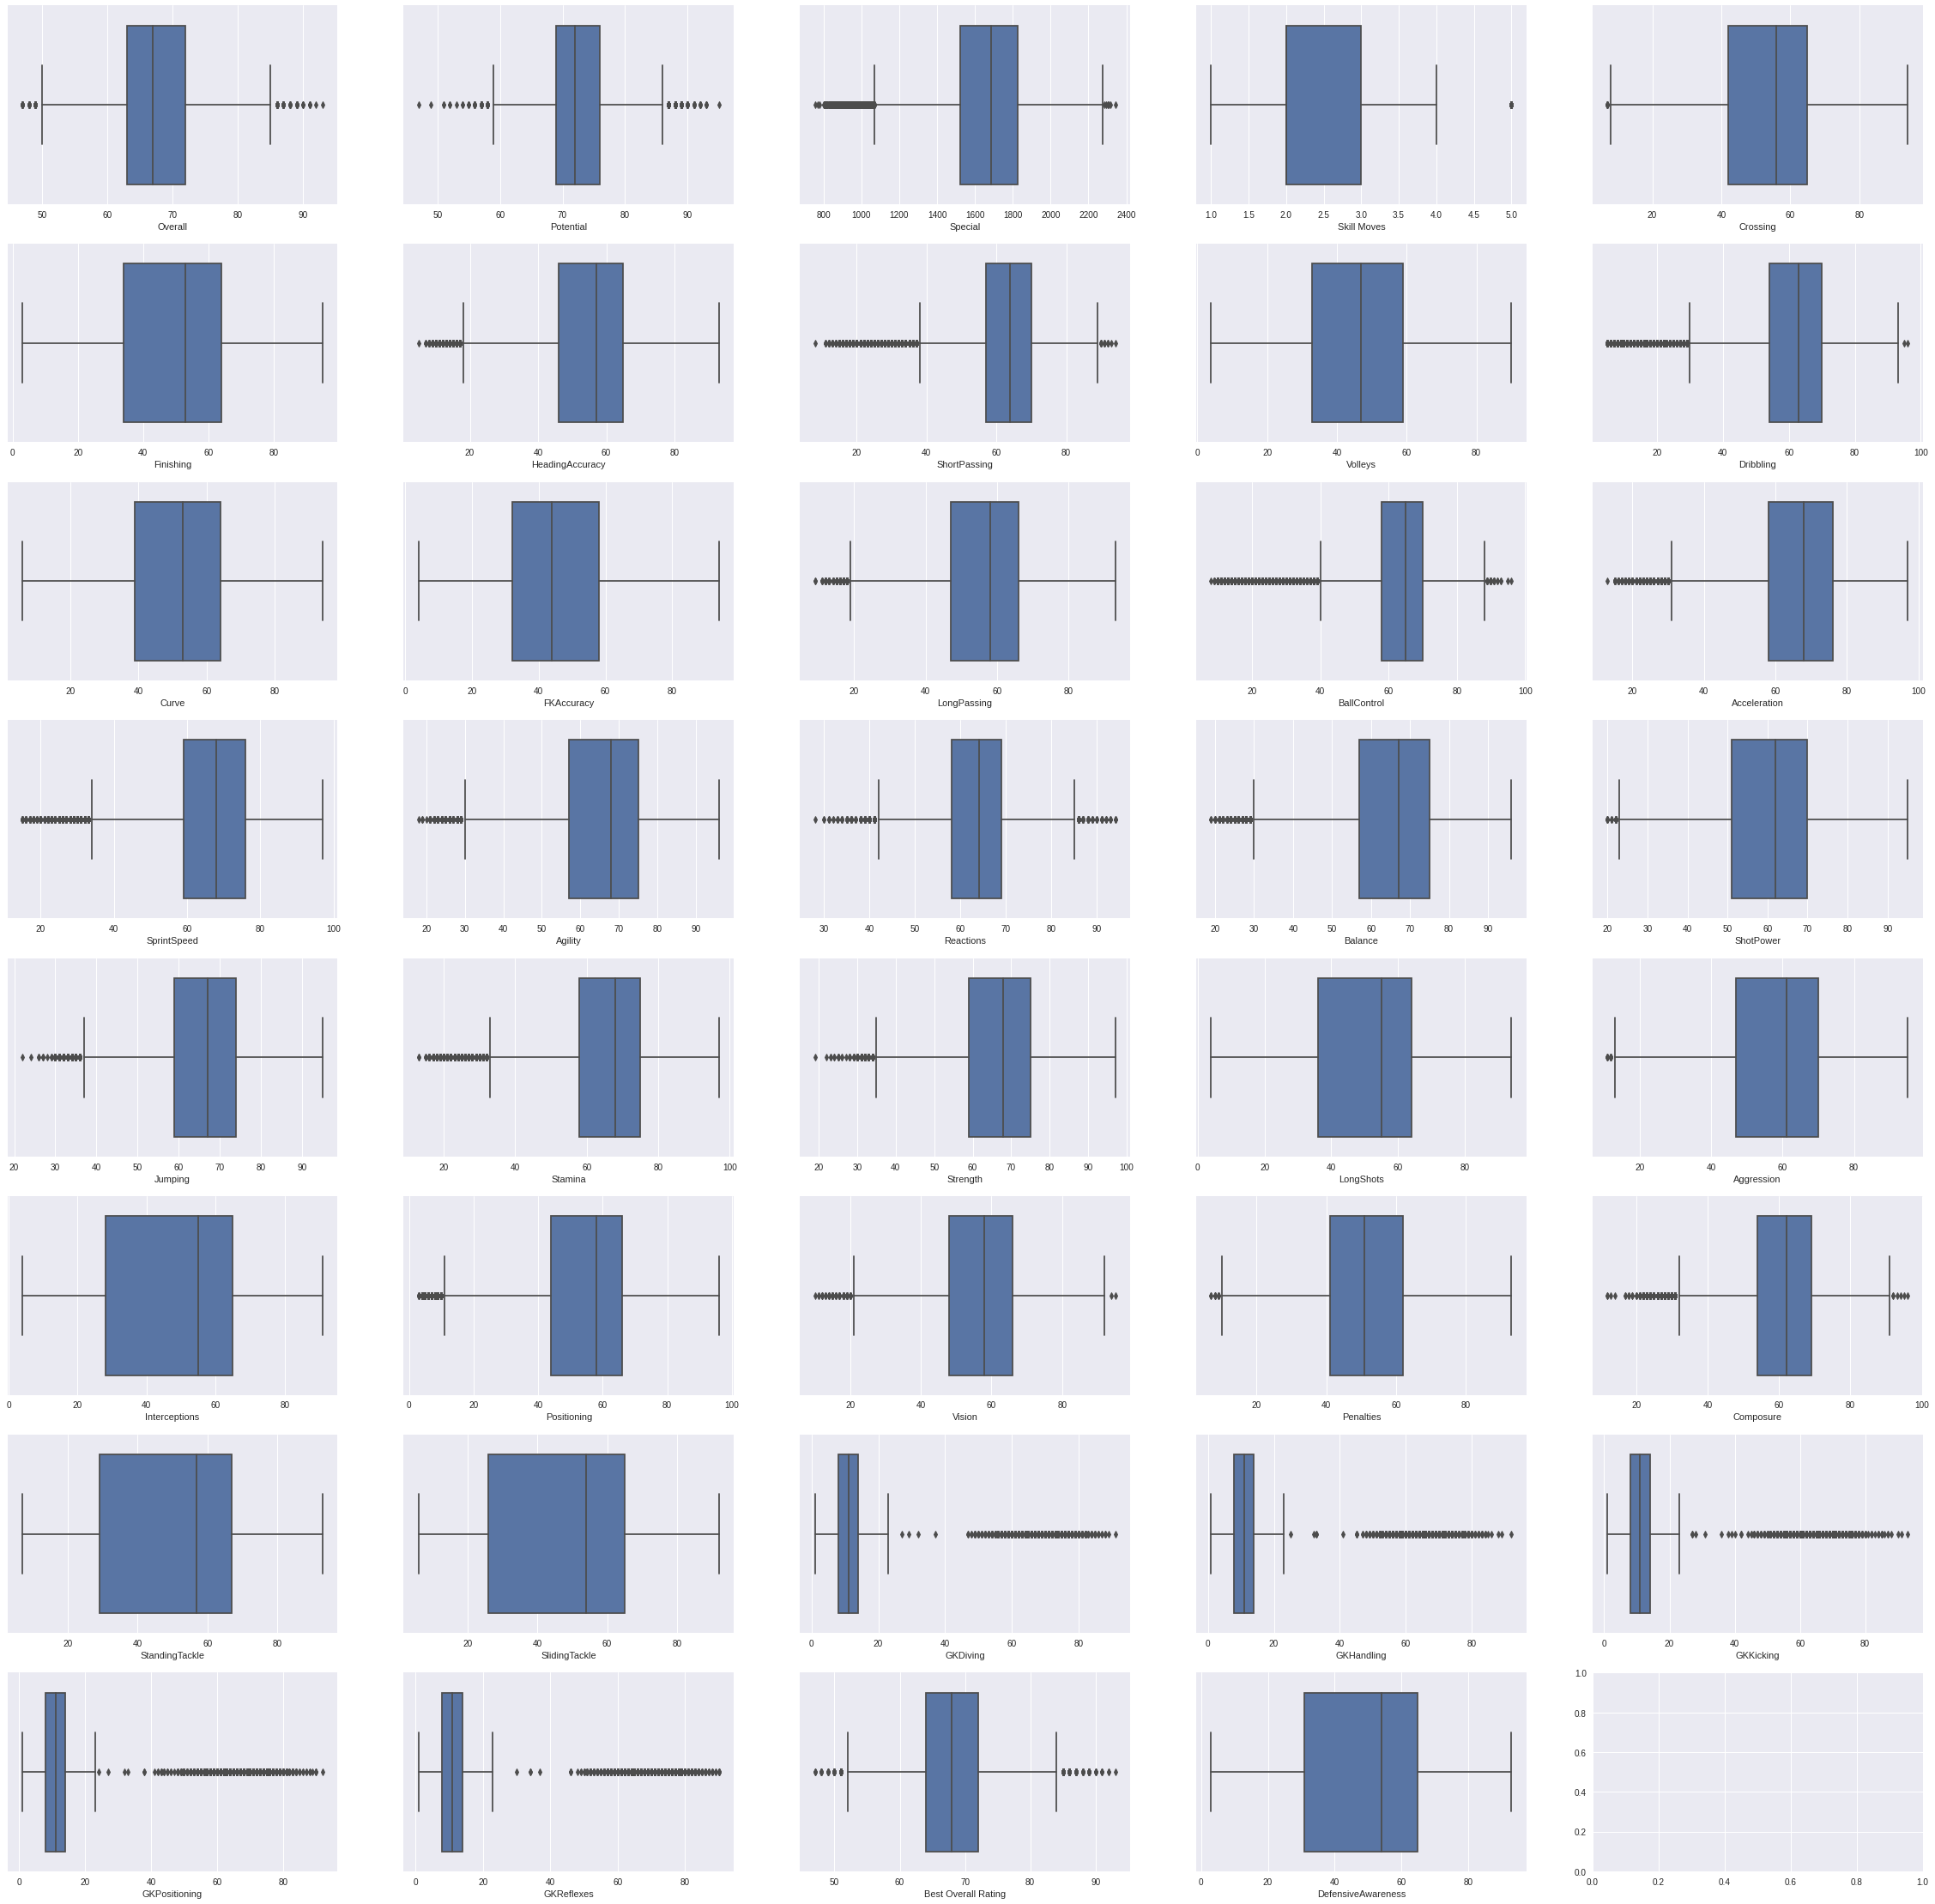

In [15]:
#Khảo sát phân phối của dữ liệu
plt.style.use('seaborn')

fig, ax = plt.subplots(figsize=(40,40), ncols=5, nrows=8)
textprops = {"fontsize":20}
sns.boxplot(x = df['Overall'],ax=ax[0,0])
sns.boxplot(x = df['Potential'],ax=ax[0,1])
sns.boxplot(x = df['Special'],ax=ax[0,2])
sns.boxplot(x = df['Skill Moves'],ax=ax[0,3])
sns.boxplot(x = df['Crossing'],ax=ax[0,4])
sns.boxplot(x = df['Finishing'],ax=ax[1,0])
sns.boxplot(x = df['HeadingAccuracy'],ax=ax[1,1])
sns.boxplot(x = df['ShortPassing'],ax=ax[1,2])
sns.boxplot(x = df['Volleys'],ax=ax[1,3])
sns.boxplot(x = df['Dribbling'],ax=ax[1,4])
sns.boxplot(x = df['Curve'],ax=ax[2,0])
sns.boxplot(x = df['FKAccuracy'],ax=ax[2,1])
sns.boxplot(x = df['LongPassing'],ax=ax[2,2])
sns.boxplot(x = df['BallControl'],ax=ax[2,3])
sns.boxplot(x = df['Acceleration'],ax=ax[2,4])
sns.boxplot(x = df['SprintSpeed'],ax=ax[3,0])
sns.boxplot(x = df['Agility'],ax=ax[3,1])
sns.boxplot(x = df['Reactions'],ax=ax[3,2])
sns.boxplot(x = df['Balance'],ax=ax[3,3])
sns.boxplot(x = df['ShotPower'],ax=ax[3,4])
sns.boxplot(x = df['Jumping'],ax=ax[4,0])
sns.boxplot(x = df['Stamina'],ax=ax[4,1])
sns.boxplot(x = df['Strength'],ax=ax[4,2])
sns.boxplot(x = df['LongShots'],ax=ax[4,3])
sns.boxplot(x = df['Aggression'],ax=ax[4,4])
sns.boxplot(x = df['Interceptions'],ax=ax[5,0])
sns.boxplot(x = df['Positioning'],ax=ax[5,1])
sns.boxplot(x = df['Vision'],ax=ax[5,2])
sns.boxplot(x = df['Penalties'],ax=ax[5,3])
sns.boxplot(x = df['Composure'],ax=ax[5,4])
sns.boxplot(x = df['StandingTackle'],ax=ax[6,0])
sns.boxplot(x = df['SlidingTackle'],ax=ax[6,1])
sns.boxplot(x = df['GKDiving'],ax=ax[6,2])
sns.boxplot(x = df['GKHandling'],ax=ax[6,3])
sns.boxplot(x = df['GKKicking'],ax=ax[6,4])
sns.boxplot(x = df['GKPositioning'],ax=ax[7,0])
sns.boxplot(x = df['GKReflexes'],ax=ax[7,1])
sns.boxplot(x = df['Best Overall Rating'],ax=ax[7,2])
sns.boxplot(x = df['DefensiveAwareness'],ax=ax[7,3]);

In [16]:
#Loại bỏ các giá trị outliers
df['Overall']= winsorize(df['Overall'],(0.01,0.014))
df['Potential'] = winsorize(df['Potential'],(0.007,0.014))
df['Special'] = winsorize(df['Special'],(0.06,0.01))
df['Skill Moves'] = winsorize(df['Skill Moves'],(0.07,0.014))
df['HeadingAccuracy'] = winsorize(df['HeadingAccuracy'],(0.013,0))
df['ShortPassing'] = winsorize(df['ShortPassing'],(0.0088,0.017))
df['Dribbling']= winsorize(df['Dribbling'],(0.08,0.005))
df['LongPassing']= winsorize(df['LongPassing'],(0.009,0))
df['BallControl']= winsorize(df['BallControl'],(0.078,0.003))
df['Acceleration']= winsorize(df['Acceleration'],(0.03,0))
df['SprintSpeed']= winsorize(df['SprintSpeed'],(0.03,0))
df['Agility'] = winsorize(df['Agility'],(0.015,0))
df['Reactions'] = winsorize(df['Reactions'],(0.02,0.02))
df['Balance'] = winsorize(df['Balance'],(0.025,0))
df['ShotPower'] = winsorize(df['ShotPower'],(0.015,0))
df['Jumping'] = winsorize(df['Jumping'],(0.01,0))
df['Stamina'] = winsorize(df['Stamina'],(0.035,0))
df['Strength'] = winsorize(df['Strength'],(0.017,0))
df['Positioning']= winsorize(df['Positioning'],(0.011,0))
df['Vision']= winsorize(df['Vision'],(0.011,0))
df['Composure']= winsorize(df['Composure'],(0.03,0.007))
df['GKDiving']= winsorize(df['GKDiving'],(0, 0.127))
df['GKHandling']= winsorize(df['GKHandling'],(0,0.13))
df['GKKicking']= winsorize(df['GKKicking'],(0,0.135))
df['GKPositioning']= winsorize(df['GKPositioning'],(0,0.125))
df['GKReflexes']= winsorize(df['GKReflexes'],(0,0.115))
df['Best Overall Rating']= winsorize(df['Best Overall Rating'],(0.01,0.01))

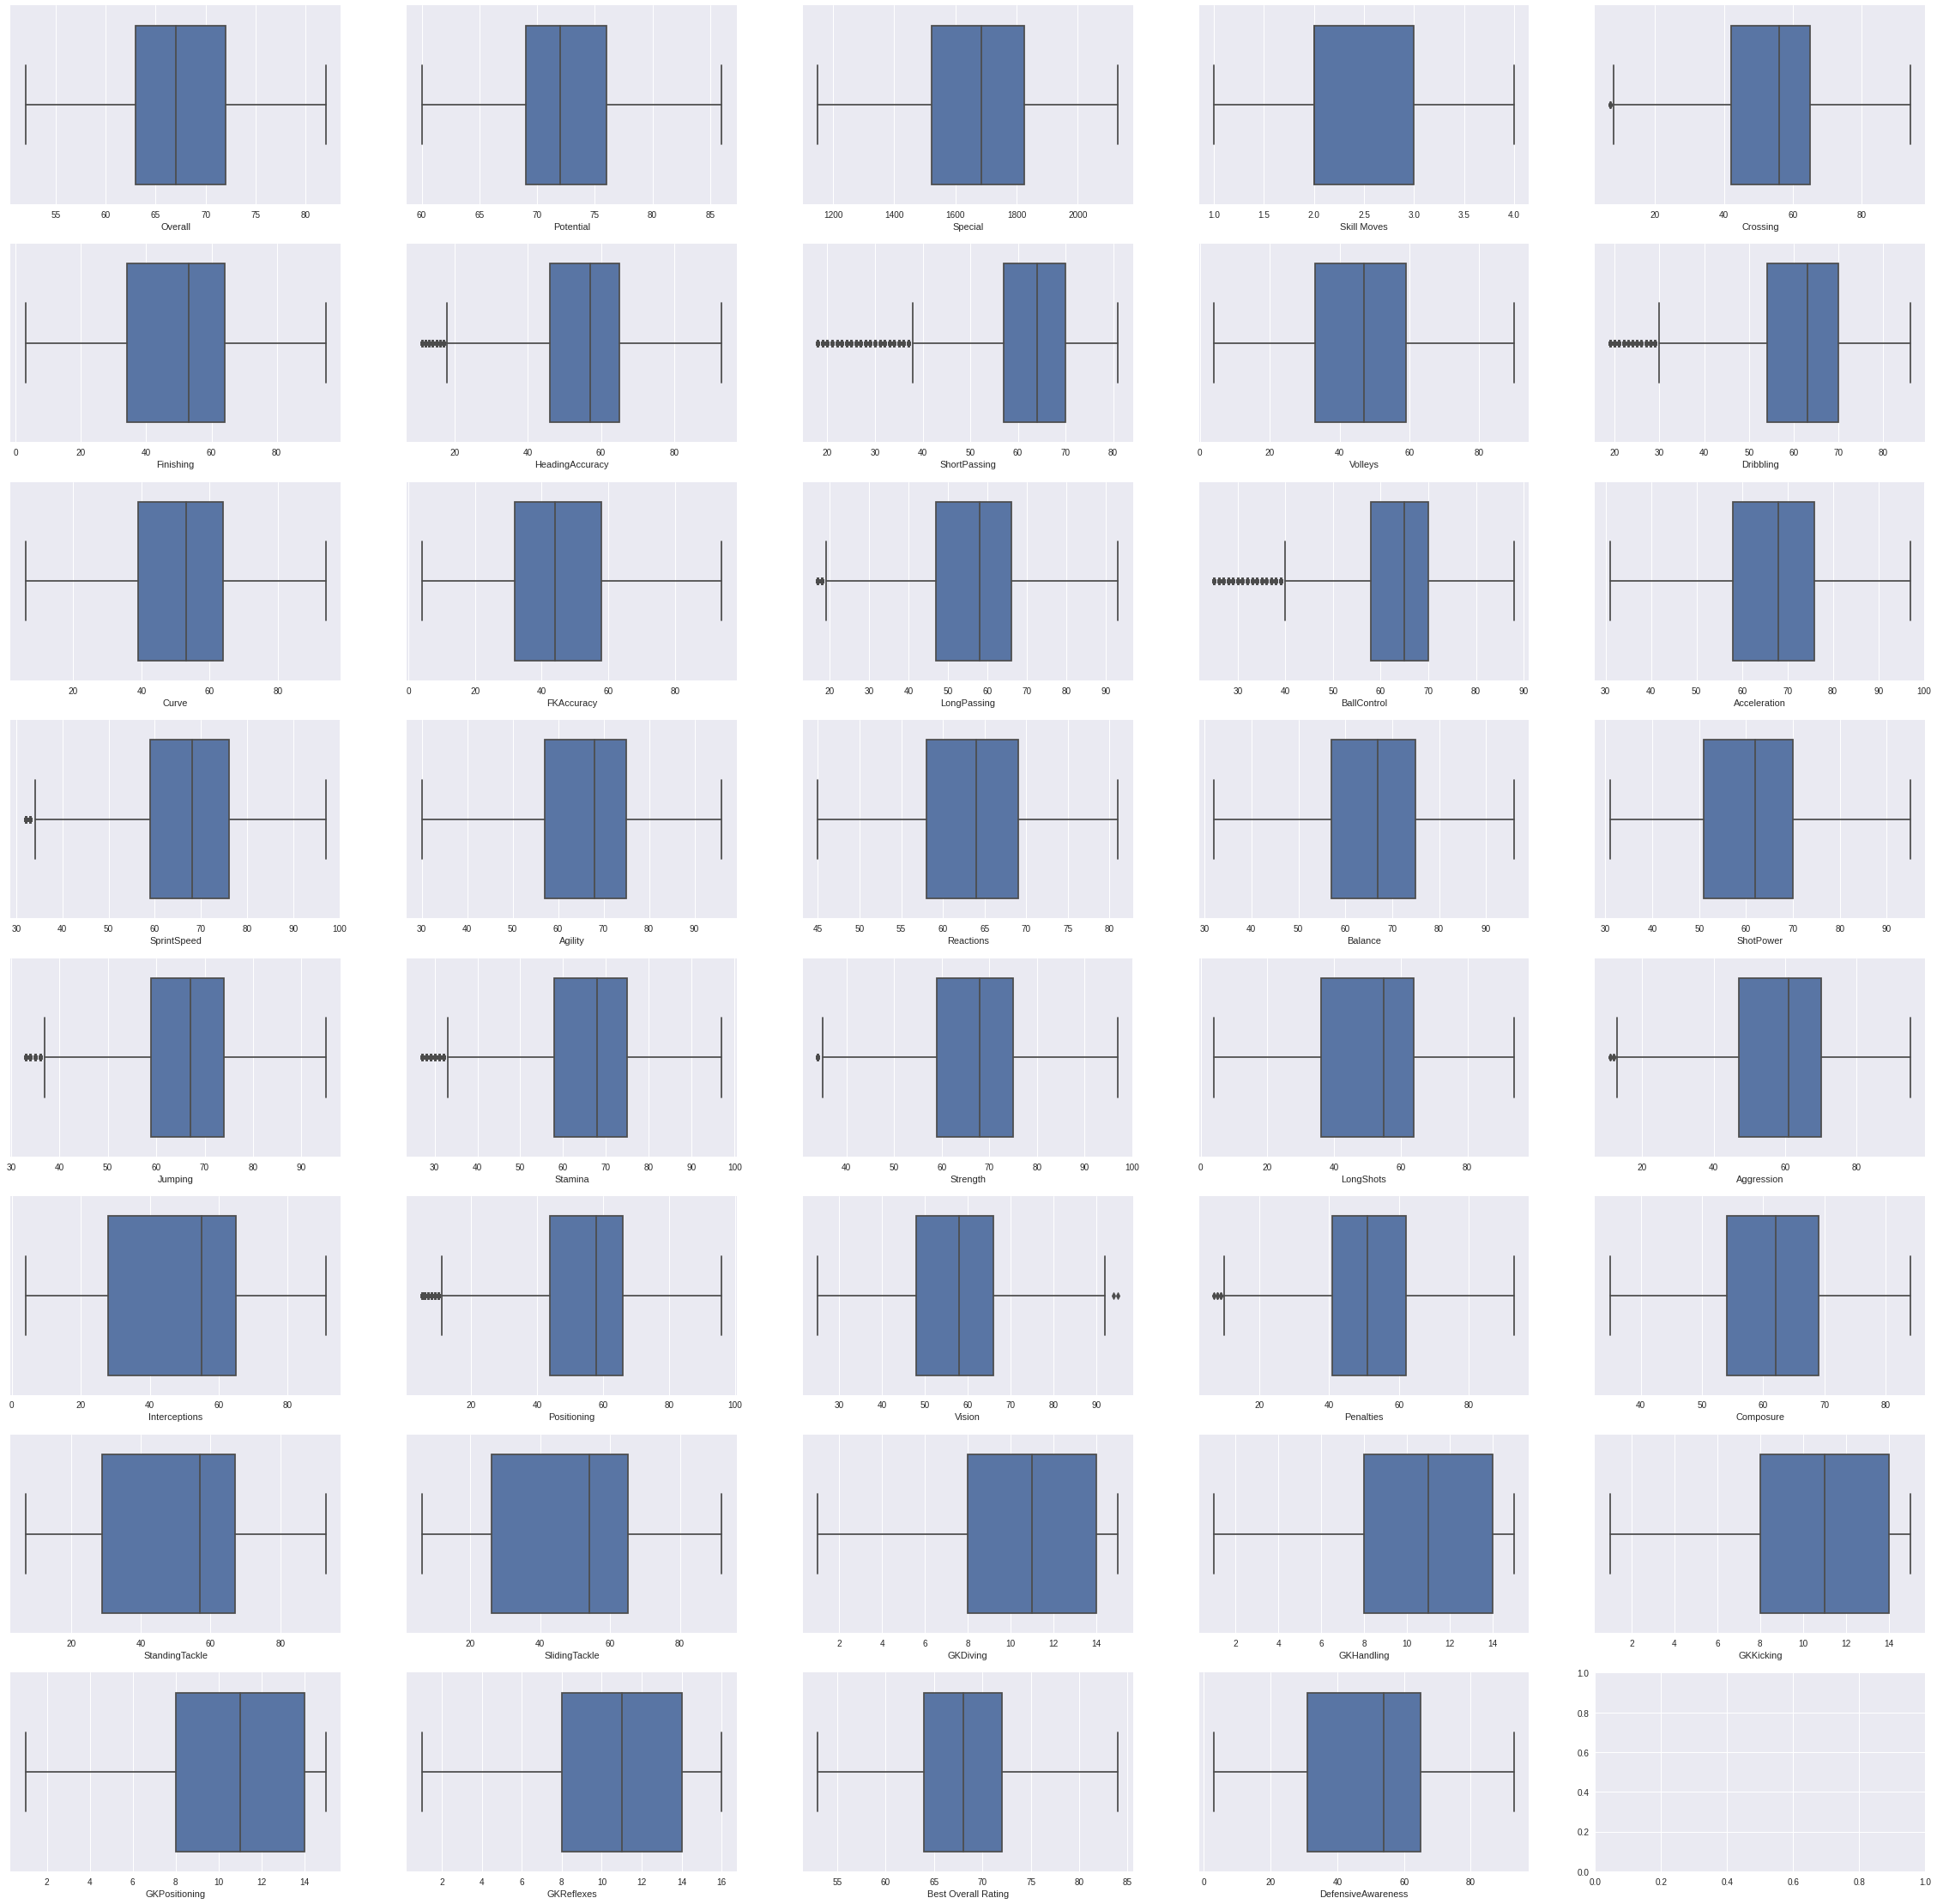

In [17]:
#Khảo sát lại phân phối của bộ data
plt.style.use('seaborn')

fig, ax = plt.subplots(figsize=(40,40), ncols=5, nrows=8)
textprops = {"fontsize":20}
sns.boxplot(x = df['Overall'],ax=ax[0,0])
sns.boxplot(x = df['Potential'],ax=ax[0,1])
sns.boxplot(x = df['Special'],ax=ax[0,2])
sns.boxplot(x = df['Skill Moves'],ax=ax[0,3])
sns.boxplot(x = df['Crossing'],ax=ax[0,4])
sns.boxplot(x = df['Finishing'],ax=ax[1,0])
sns.boxplot(x = df['HeadingAccuracy'],ax=ax[1,1])
sns.boxplot(x = df['ShortPassing'],ax=ax[1,2])
sns.boxplot(x = df['Volleys'],ax=ax[1,3])
sns.boxplot(x = df['Dribbling'],ax=ax[1,4])
sns.boxplot(x = df['Curve'],ax=ax[2,0])
sns.boxplot(x = df['FKAccuracy'],ax=ax[2,1])
sns.boxplot(x = df['LongPassing'],ax=ax[2,2])
sns.boxplot(x = df['BallControl'],ax=ax[2,3])
sns.boxplot(x = df['Acceleration'],ax=ax[2,4])
sns.boxplot(x = df['SprintSpeed'],ax=ax[3,0])
sns.boxplot(x = df['Agility'],ax=ax[3,1])
sns.boxplot(x = df['Reactions'],ax=ax[3,2])
sns.boxplot(x = df['Balance'],ax=ax[3,3])
sns.boxplot(x = df['ShotPower'],ax=ax[3,4])
sns.boxplot(x = df['Jumping'],ax=ax[4,0])
sns.boxplot(x = df['Stamina'],ax=ax[4,1])
sns.boxplot(x = df['Strength'],ax=ax[4,2])
sns.boxplot(x = df['LongShots'],ax=ax[4,3])
sns.boxplot(x = df['Aggression'],ax=ax[4,4])
sns.boxplot(x = df['Interceptions'],ax=ax[5,0])
sns.boxplot(x = df['Positioning'],ax=ax[5,1])
sns.boxplot(x = df['Vision'],ax=ax[5,2])
sns.boxplot(x = df['Penalties'],ax=ax[5,3])
sns.boxplot(x = df['Composure'],ax=ax[5,4])
sns.boxplot(x = df['StandingTackle'],ax=ax[6,0])
sns.boxplot(x = df['SlidingTackle'],ax=ax[6,1])
sns.boxplot(x = df['GKDiving'],ax=ax[6,2])
sns.boxplot(x = df['GKHandling'],ax=ax[6,3])
sns.boxplot(x = df['GKKicking'],ax=ax[6,4])
sns.boxplot(x = df['GKPositioning'],ax=ax[7,0])
sns.boxplot(x = df['GKReflexes'],ax=ax[7,1])
sns.boxplot(x = df['Best Overall Rating'],ax=ax[7,2])
sns.boxplot(x = df['DefensiveAwareness'],ax=ax[7,3]);

In [18]:
df_final = pd.concat([df,df_gk])

In [19]:
#Xuất clean dataset
df_final.to_csv('FIFA22_official_data_clean_final.csv', index=False, header=True)

#Data Visualization

**Age distribution of players**

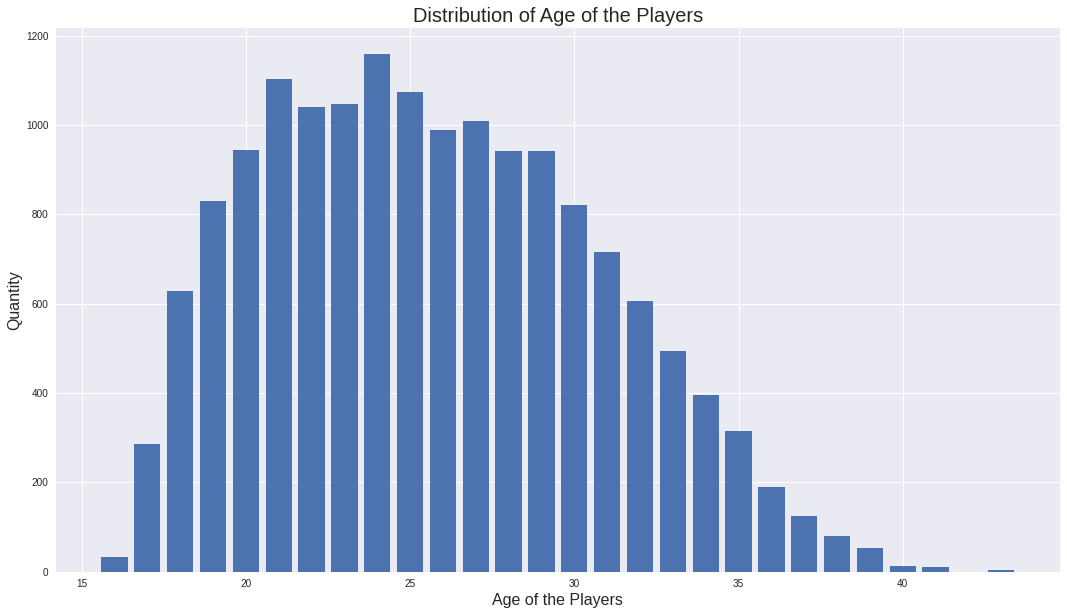

In [21]:
x = df_final['Age'].value_counts().index
y = df_final['Age'].value_counts()
plt.figure(figsize=(18,10))
plt.bar(x, y)
plt.xlabel('Age of the Players', fontsize = 16)
plt.ylabel('Quantity', fontsize =16)
plt.title('Distribution of Age of the Players', fontsize = 20)
plt.show();

**Overall Score of Players**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


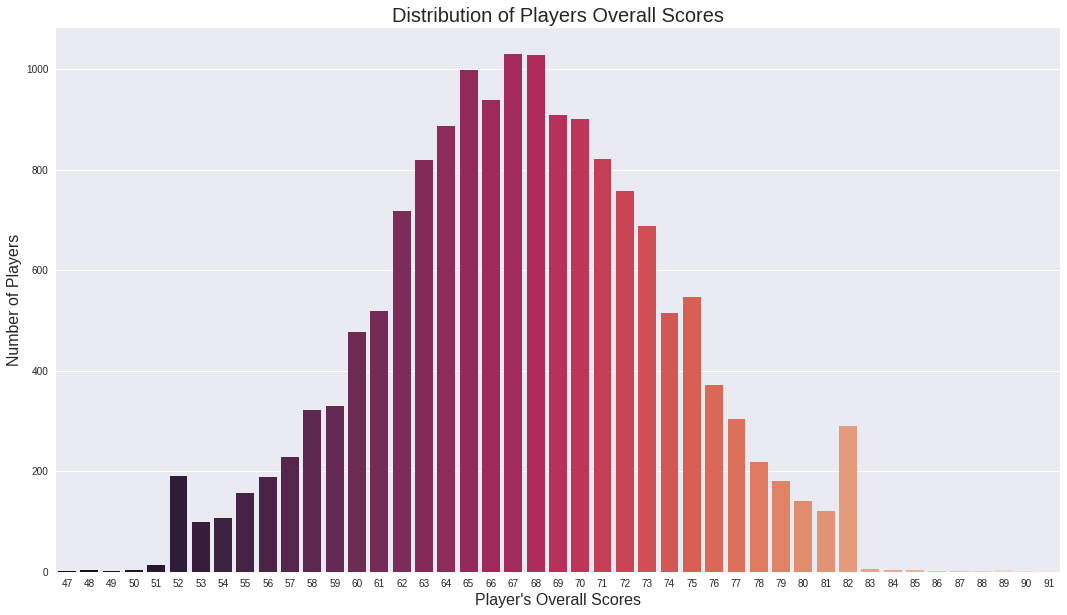

In [22]:
x = df_final['Overall']
plt.figure(figsize=(18,10))
sns.countplot(x, palette='rocket')
plt.xlabel(xlabel = "Player's Overall Scores", fontsize = 16)
plt.ylabel(ylabel = 'Number of Players', fontsize = 16)
plt.title(label = 'Distribution of Players Overall Scores', fontsize = 20)
plt.show();

**Distribution of Best Position of players**

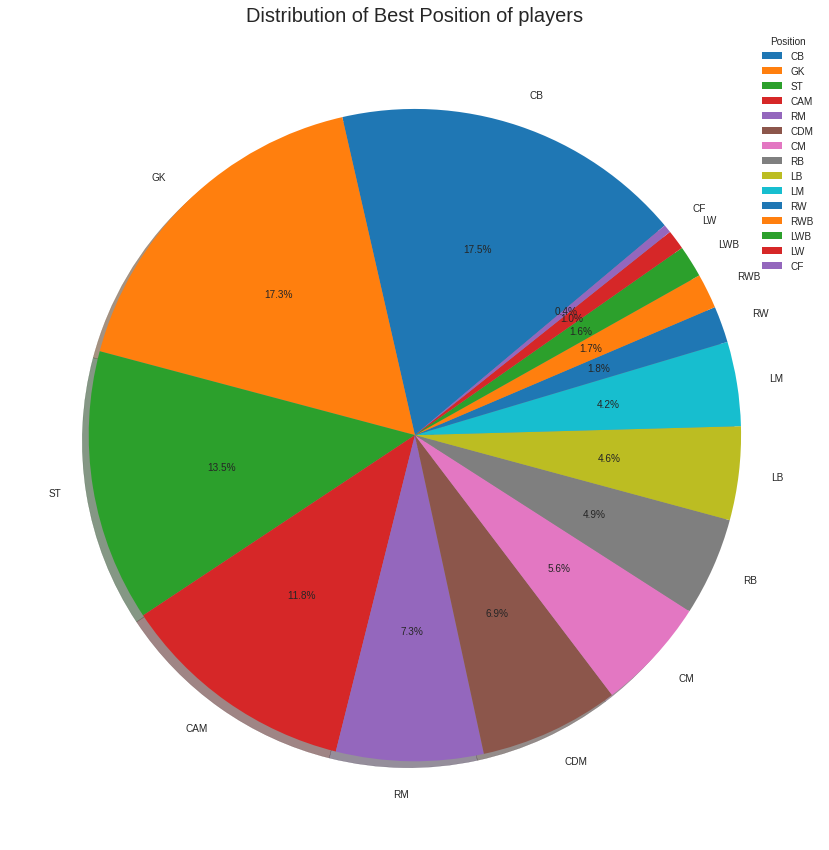

In [23]:
import matplotlib.colors as colors

plt.figure(figsize=(18,15))
labels = df_final['Best Position'].value_counts().index
size = df_final['Best Position'].value_counts()
plt.pie(size,labels = labels, shadow =True, autopct='%1.1f%%', colors = colors.TABLEAU_COLORS ,startangle = 40)
plt.title('Distribution of Best Position of players', fontsize = 20)
plt.legend(labels, title = 'Position',loc='upper right',fontsize = 10)
plt.show();

**Top 10 countries with most number of players**

In [24]:
top_countries = df_final['Nationality'].value_counts().head(10)

top_countries

England          1744
Germany          1137
Spain            1087
France            942
Argentina         779
Brazil            731
Italy             463
Netherlands       436
United States     349
Portugal          332
Name: Nationality, dtype: int64

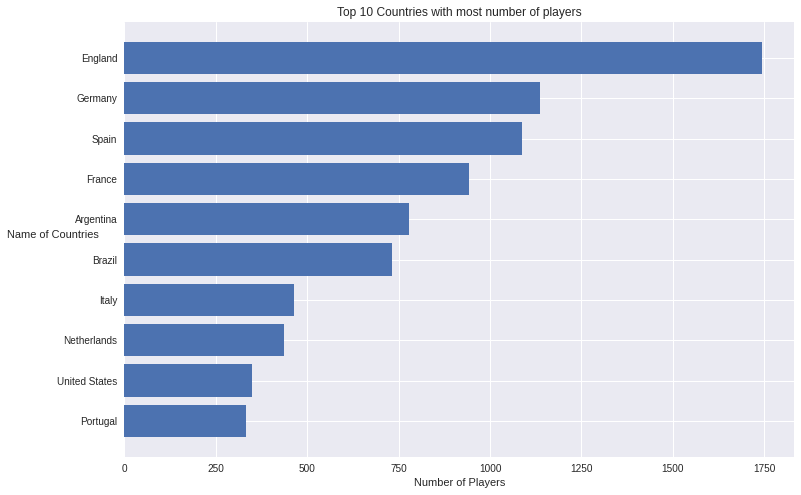

In [25]:
fig, ax = plt.subplots(figsize=(12,8))
x = top_countries.values
y = top_countries.index
plt.barh(y, x, align='center')
plt.gca().invert_yaxis()
plt.xlabel('Number of Players')
plt.ylabel('Name of Countries', rotation=0)
plt.title('Top 10 Countries with most number of players')
plt.show();

**Skill Moves and Prefered Legs of the players**

Text(0.5, 1.0, 'Skill Moves of Players segregated by Preferred Foot')

Text(0.5, 0, 'Skill Moves')

Text(0, 0.5, 'Number')

Text(-0.2, 2418.1, '2418')

Text(0.8, 4685.1, '4685')

Text(1.8, 4166.1, '4166')

Text(2.8, 867.1, '867')

Text(0.2, 322.1, '322')

Text(1.2, 1543.1, '1543')

Text(2.2, 1491.1, '1491')

Text(3.2, 359.1, '359')

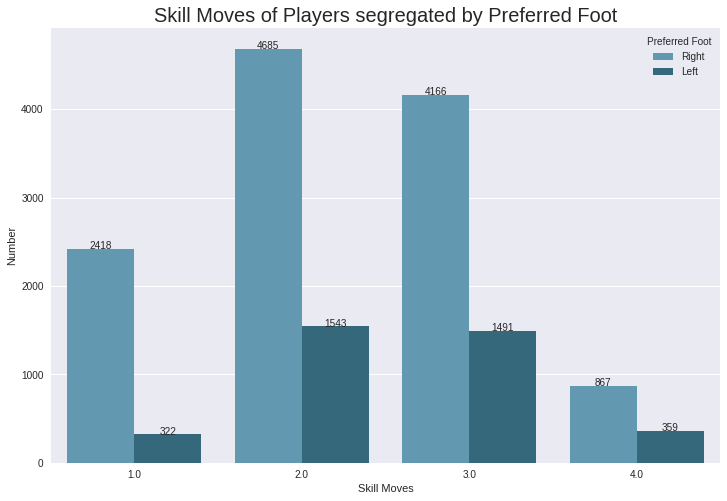

In [26]:
fig, ax = plt.subplots(figsize=(12,8))
graph = sns.countplot(ax=ax,x=df_final['Skill Moves'], data=df_final, hue='Preferred Foot', palette = 'PuBuGn_d')
plt.title('Skill Moves of Players segregated by Preferred Foot'  , fontsize = 20)
plt.xlabel('Skill Moves')
plt.ylabel('Number')
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center");

**Values and Wage of the players**

In [27]:
def normalizing_wage(x):
    if '€' in str(x): 
      if 'M' in str(x):
        c = str(x).replace('€' , '')
        c = str(c).replace('M' , '')
        c = float(c) * 1000000
      elif 'K' in str(x):
        c = str(x).replace('€' , '')
        c = str(c).replace('K' , '')
        c = float(c) * 1000
      else:
        c = str(x).replace('€', '')
        c = float(c)
    return c

def normalizing_value(x):
    if '€' in str(x): 
      if 'M' in str(x):
        c = str(x).replace('€' , '')
        c = str(c).replace('M' , '')
        c = float(c) * 1000000
      elif 'K' in str(x):
        c = str(x).replace('€' , '')
        c = str(c).replace('K' , '')
        c = float(c) * 1000
      else:
        c = str(x).replace('€', '')
        c = float(c)
    return c
df_final['Normalized_Value'] = df_final['Value'].apply(lambda x : normalizing_wage(x))
df_final['Normalized_Wage'] = df_final['Wage'].apply(lambda x : normalizing_wage(x))
df_final.sort_values(by = 'Normalized_Value' , ascending = False)[['Name','Club','Nationality','Overall',
'Age','Normalized_Value','Value']].head(10)

,Name,Club,Nationality,Overall,Age,Normalized_Value,Value
82,K. Mbappé,Paris Saint-Germain,France,82,22,194000000.0,€194M
251,E. Haaland,Borussia Dortmund,Norway,82,20,137500000.0,€137.5M
39,H. Kane,Tottenham Hotspur,England,82,27,129500000.0,€129.5M
64,Neymar Jr,Paris Saint-Germain,Brazil,82,29,129000000.0,€129M
3,K. De Bruyne,Manchester City,Belgium,82,30,125500000.0,€125.5M
14608,G. Donnarumma,Paris Saint-Germain,Italy,89,22,119500000.0,€119.5M
33,R. Lewandowski,FC Bayern München,Poland,82,32,119500000.0,€119.5M
17,F. de Jong,FC Barcelona,Netherlands,82,24,119500000.0,€119.5M
14608,G. Donnarumma,Paris Saint-Germain,Italy,82,22,119500000.0,€119.5M
855,J. Sancho,Manchester United,England,82,21,116500000.0,€116.5M


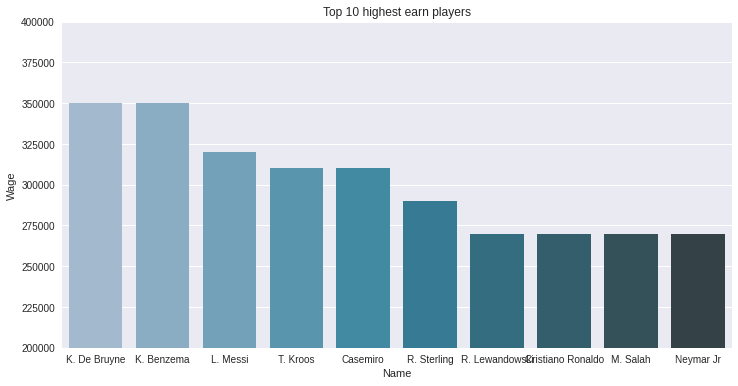

In [ ]:
df_final_highest_earn = pd.DataFrame.copy(df_final.sort_values(by = 'Normalized_Wage' , ascending = False).head(10))
plt.figure(1,figsize = (12,6))
sns.barplot(x ='Name' , y = 'Normalized_Wage' , data = df_final_highest_earn, palette='PuBuGn_d')
plt.xlabel('Name')
plt.ylabel('Wage')
plt.title('Top 10 highest earn players')
plt.ylim(200000,400000)
plt.show();